## Annual Global Temperatures

This notebook serves as an Introduction to plotting with python. It shows the different approaches for creating an annual global temperatures plot, progressing from simple to more complex.

Let's start by loading the data into a dataframe and printing its structure.

In [3]:
from temperature import load_temperature_df
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filepath = os.path.join("..", "data", "temperatures.csv")

df = load_temperature_df(filepath)
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (146, 20)

First 5 rows:
        Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  \
0 1880-01-01 -0.20  -.25  -.09  -.16  -.09  -.21  -.20  -.10  -.15  -.23   
1 1881-01-01 -0.20  -.15   .02   .04   .07  -.19   .01  -.04  -.16  -.22   
2 1882-01-01  0.16   .14   .05  -.16  -.14  -.22  -.16  -.08  -.15  -.23   
3 1883-01-01 -0.29  -.36  -.12  -.18  -.17  -.07  -.07  -.14  -.22  -.11   
4 1884-01-01 -0.13  -.08  -.36  -.40  -.33  -.34  -.30  -.27  -.27  -.25   

    Nov   Dec   J-D   D-N   DJF   MAM   JJA   SON  Annual_Mean  
0  -.23  -.18  -.17   ***   ***  -.11  -.17  -.20        -0.17  
1  -.19  -.07  -.09  -.10  -.18   .04  -.07  -.19        -0.09  
2  -.17  -.36  -.11  -.09   .08  -.08  -.15  -.18        -0.11  
3  -.24  -.11  -.17  -.19  -.34  -.16  -.09  -.19        -0.17  
4  -.33  -.31  -.28  -.26  -.10  -.36  -.31  -.28        -0.28  


## 1. Basic Plotting with pandas

The simplest way to create a plot is using pandas' built-in plotting capabilities. This approach requires minimal code but provides fewer customization options.

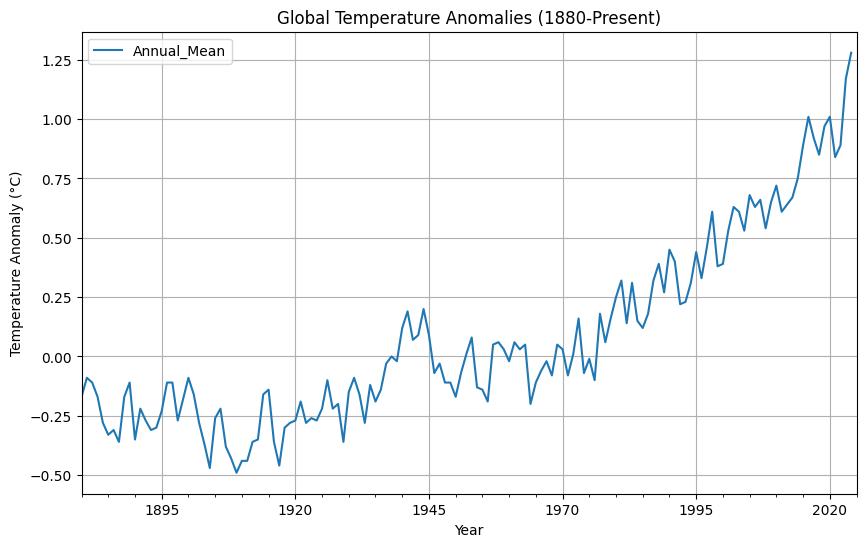

In [4]:
# Basic plot using pandas
df.plot(x='Year', y='Annual_Mean', figsize=(10, 6), title='Global Temperature Anomalies (1880-Present)')
plt.grid(True)
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

## 2. Intermediate Plotting with Matplotlib

Using Matplotlib directly gives us more control over the plot's appearance and features.
Here we create a more customized visualization using the `plt` object.

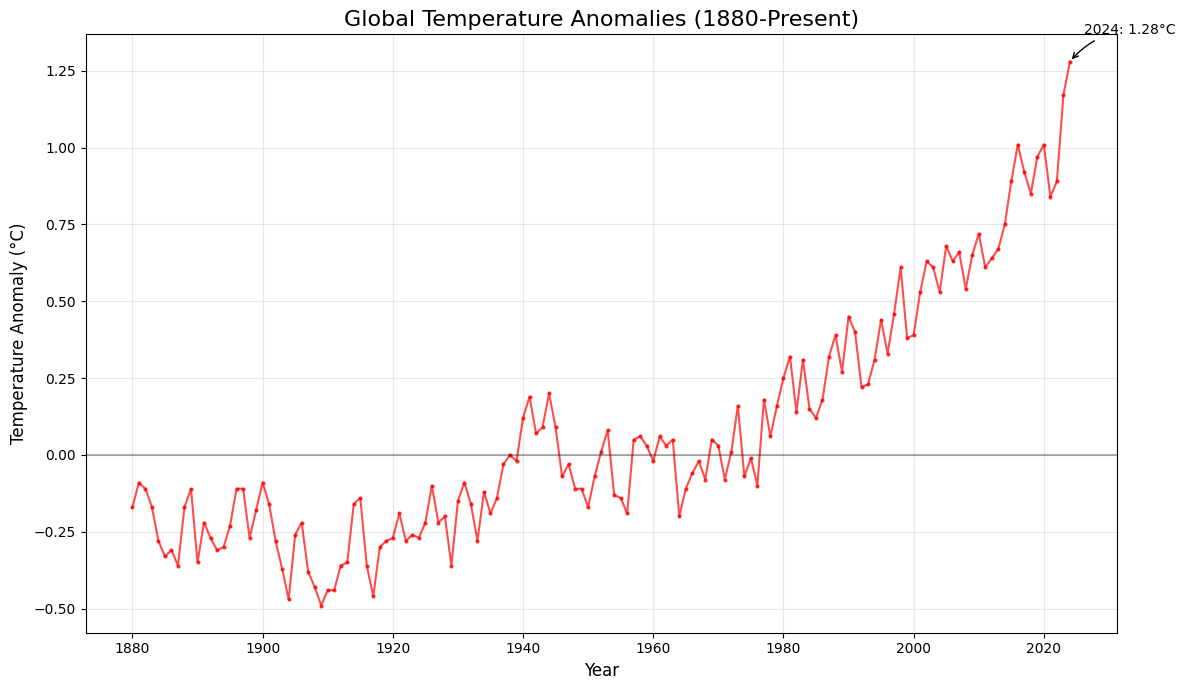

In [5]:
# Create figure with specified size
plt.figure(figsize=(12, 7))

# Plot the data with custom styling
plt.plot(df['Year'], df['Annual_Mean'], color='red', linewidth=1.5, marker='o', 
         markersize=2, alpha=0.7)

# Add a reference line at 0°C
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add a trend line (using numpy's polyfit)
z = np.polyfit(df.index, df['Annual_Mean'], 1)
p = np.poly1d(z)
plt.plot(df['Year'], p(df.index), "b--", linewidth=1, alpha=0.8)

# Customize the plot
plt.title('Global Temperature Anomalies (1880-Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations for key years
recent_year = df.iloc[-2]
plt.annotate(f"{recent_year['Year'].year}: {recent_year['Annual_Mean']:.2f}°C",
             xy=(recent_year['Year'], recent_year['Annual_Mean']),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

plt.tight_layout()
plt.show()

## 3. Advanced Plotting with Matplotlib Axes Objects

For even more control, we can use explicit `Figure` and `Axes` objects. This approach offers the most flexibility and is ideal for complex visualizations.

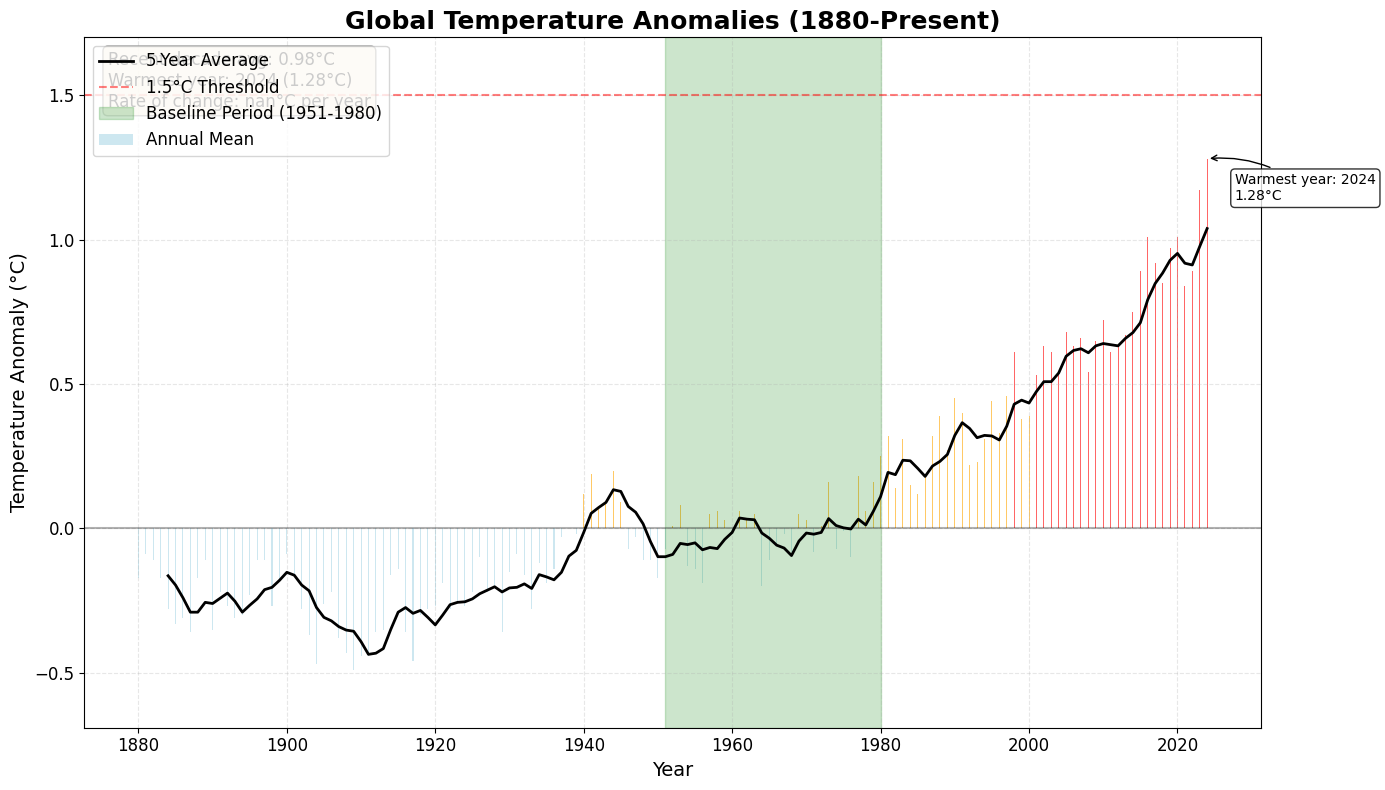

In [ ]:
# Create a color map based on temperature
def temp_to_color(temp):
    """Convert temperature to a color (blue=cold, red=hot)"""
    if temp < -0.5:
        return 'blue'
    elif temp < 0:
        return 'lightblue'
    elif temp < 0.5:
        return 'orange'
    else:
        return 'red'

# Create colors for each data point
colors = [temp_to_color(temp) for temp in df['Annual_Mean']]

# Calculate 5-year rolling average
df['Five_Year_Avg'] = df['Annual_Mean'].rolling(window=5).mean()

# Calculate temperature bands
df_recent = df[df['Year'].dt.year >= 1951]
baseline_period = df[(df['Year'].dt.year >= 1951) & (df['Year'].dt.year <= 1980)]['Annual_Mean'].mean()

# Create Figure and Axes objects
fig, ax = plt.subplots(figsize=(14, 8))

# Main temperature anomaly plot
ax.bar(df['Year'], df['Annual_Mean'], color=colors, width=100, alpha=0.6, label='Annual Mean')
ax.plot(df['Year'], df['Five_Year_Avg'], color='black', linewidth=2, label='5-Year Average')

# Add reference lines
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.axhline(y=1.5, color='red', linestyle='--', alpha=0.5, label='1.5°C Threshold')

# Shade the 1951-1980 baseline period
baseline_start = pd.to_datetime('1951', format='%Y')
baseline_end = pd.to_datetime('1980', format='%Y')
ax.axvspan(baseline_start, baseline_end, alpha=0.2, color='green', label='Baseline Period (1951-1980)')

# Customize the plot with more advanced options
ax.set_title('Global Temperature Anomalies (1880-Present)', fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature Anomaly (°C)', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a legend
ax.legend(loc='upper left', fontsize=12)

# Add annotations
warmest_year = df.loc[df['Annual_Mean'].idxmax()]
ax.annotate(f"Warmest year: {warmest_year['Year'].year}\n{warmest_year['Annual_Mean']:.2f}°C",
            xy=(warmest_year['Year'], warmest_year['Annual_Mean']),
            xytext=(20, -30), textcoords='offset points',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Add a text box with statistics
recent_decade = df[df['Year'].dt.year >= df['Year'].dt.year.max() - 10]
stats_text = f"Recent decade avg: {recent_decade['Annual_Mean'].mean():.2f}°C\n"
stats_text += f"Warmest year: {warmest_year['Year'].year} ({warmest_year['Annual_Mean']:.2f}°C)\n"
stats_text += f"Rate of change: {z[0]:.4f}°C per year"

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Set y-axis limits with some padding
y_min = df['Annual_Mean'].min() - 0.2
y_max = max(df['Annual_Mean'].max() + 0.2, 1.7)  # Ensure the 1.5°C line is visible
ax.set_ylim(y_min, y_max)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## 4. Multiple Subplots Example

This advanced example shows how to create multiple related plots in a single figure.

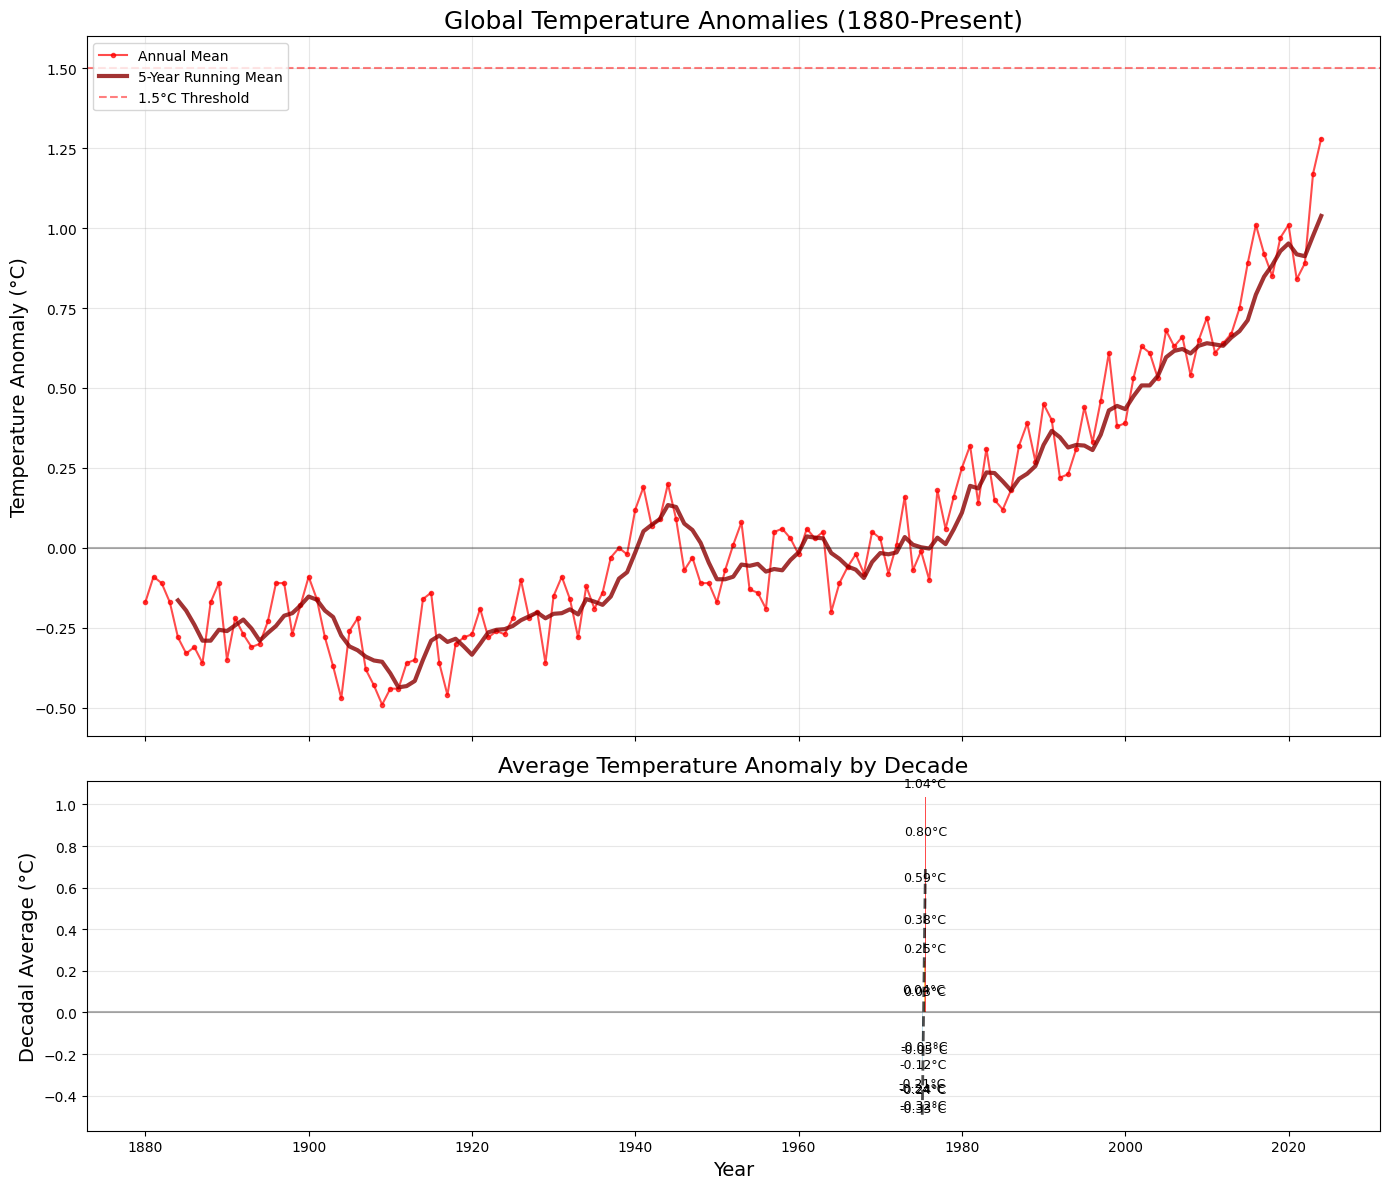

In [7]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Main temperature time series
axes[0].plot(df['Year'], df['Annual_Mean'], color='red', linewidth=1.5, marker='o', 
         markersize=3, alpha=0.7, label='Annual Mean')
axes[0].plot(df['Year'], df['Five_Year_Avg'], color='darkred', linewidth=3, 
         alpha=0.8, label='5-Year Running Mean')

# Add horizontal reference lines
axes[0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[0].axhline(y=1.5, color='red', linestyle='--', alpha=0.5, label='1.5°C Threshold')

# Customization
axes[0].set_title('Global Temperature Anomalies (1880-Present)', fontsize=18)
axes[0].set_ylabel('Temperature Anomaly (°C)', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='upper left')

# Plot 2: Decade averages as a bar chart
# Group data by decades
df['Decade'] = (df['Year'].dt.year // 10) * 10
decade_means = df.groupby('Decade')['Annual_Mean'].mean()
decades = decade_means.index

# Create a bar chart for decade averages
bar_colors = [temp_to_color(temp) for temp in decade_means.values]
axes[1].bar(decades, decade_means.values, width=8, color=bar_colors, alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add a trend line for decades
z_decades = np.polyfit(range(len(decades)), decade_means.values, 1)
p_decades = np.poly1d(z_decades)
axes[1].plot(decades, p_decades(range(len(decades))), 'k--', linewidth=2, alpha=0.7)

# Customization
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Decadal Average (°C)', fontsize=14)
axes[1].set_title('Average Temperature Anomaly by Decade', fontsize=16)
axes[1].grid(True, alpha=0.3, axis='y')

# Add decade values as text on the bars
for i, (decade, value) in enumerate(zip(decades, decade_means.values)):
    axes[1].annotate(f"{value:.2f}°C",
                     xy=(decade, value),
                     xytext=(0, 5 if value > 0 else -15),
                     textcoords="offset points",
                     ha='center', va='bottom' if value > 0 else 'top',
                     fontsize=9)

# Adjust layout and display
plt.tight_layout()
plt.show()

## Conclusion

This notebook has demonstrated several approaches to plotting data in Python:

1. **Simple pandas plotting** - Quick and easy, good for basic visualizations
2. **Intermediate matplotlib plotting** - More control over appearance using the `plt` interface
3. **Advanced matplotlib with axes objects** - Maximum flexibility and control for complex visualizations
4. **Multiple subplots** - Combining related visualizations in a single figure

As you can see, matplotlib offers tremendous flexibility, allowing you to create anything from simple plots to publication-quality visualizations with annotations, styling, and multiple related charts.